# Text Mining of NYT data set

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
from nltk.corpus import stopwords  
from wordcloud import WordCloud

In [2]:
nyt = pd.read_csv('csv_files/nyt.csv')
nyt.head()

,snippet,abstract,pub_date,_id,section_name,uri,type_of_material,source,print_section,lead_paragraph,word_count,news_desk,web_url,document_type,print_page,headline,author
0,Mexican lawmakers reach compromise on country'...,Mexican lawmakers reach compromise on country'...,1998-12-31T05:00:00+0000,nyt://article/6238be98-a87a-5fbd-8a5d-20b15341...,World,nyt://article/6238be98-a87a-5fbd-8a5d-20b15341...,News,The New York Times,A,After weeks of tense impasse and with less tha...,518,Foreign Desk,https://www.nytimes.com/1998/12/31/world/just-...,article,9,"Just Hours Before Deadline, Mexicans Draft an ...",By Ginger Thompson
1,Three new studies report new technique to pinp...,Three new studies report new technique to pinp...,1998-12-29T05:00:00+0000,nyt://article/bd31e0fe-4053-55f8-9e24-86b10281...,Science,nyt://article/bd31e0fe-4053-55f8-9e24-86b10281...,News,The New York Times,F,"Every winter, after flying south from the East...",1170,Science Desk,https://www.nytimes.com/1998/12/29/science/on-...,article,5,"On the Trail of the Monarch, With the Aid of C...",By Carol Kaesuk Yoon
2,Interview with Lieut Col Hildegardo Bacillo Go...,Interview with Lieut Col Hildegardo Bacillo Go...,1998-12-29T05:00:00+0000,nyt://article/fc8cfb88-aa41-5ec5-8328-f2e6d870...,World,nyt://article/fc8cfb88-aa41-5ec5-8328-f2e6d870...,News,The New York Times,A,Sheltered from view by bushes on the side of t...,1352,Foreign Desk,https://www.nytimes.com/1998/12/29/world/mexic...,article,3,Mexican Army Protester Goes Loudly Into Hiding,By Ginger Thompson
3,"Some 2,000 people gather at graves of 45 peopl...","Some 2,000 people gather at graves of 45 peopl...",1998-12-23T05:00:00+0000,nyt://article/1eaf78c0-88df-5390-bd95-664fcf07...,World,nyt://article/1eaf78c0-88df-5390-bd95-664fcf07...,News,The New York Times,A,"For six days, only the dogs and chickens were ...",951,Foreign Desk,https://www.nytimes.com/1998/12/23/world/actea...,article,4,Acteal Journal; Where Killings Defiled a Churc...,By Ginger Thompson
4,Ambitious United States effort to help train a...,Ambitious United States effort to help train a...,1998-12-23T05:00:00+0000,nyt://article/aae2ecc4-f440-5989-bdab-6e56f562...,World,nyt://article/aae2ecc4-f440-5989-bdab-6e56f562...,News,The New York Times,A,An ambitious United States effort to help trai...,1261,Foreign Desk,https://www.nytimes.com/1998/12/23/world/us-he...,article,1,U.S. Help for Mexican Military Has Not Curtail...,By Tim Golden


In [3]:
stop_words = set(stopwords.words('english'))  

def freq_dic(text):
    words =  word_tokenize(text)
    new_words= [word.lower() for word in words if word.isalnum() and not word in stop_words and len(word)>1]
    freq_dic = FreqDist(new_words)
    return pd.DataFrame.from_dict(freq_dic, orient='index').reset_index().rename(columns = {0:'freq', 'index' : 'word'})

def freq_dic_row(row):
    df = (freq_dic(row.abstract)
        .assign(
            abstract = row.abstract,
            date = row.pub_date,
            section_name = row.section_name,
            print_page = row.print_page,
            document_type = row.document_type
            )
        )
    return df

tkn_nyt = pd.concat({i:freq_dic_row(row) for i,row in nyt.iterrows()}).reset_index(drop = True)

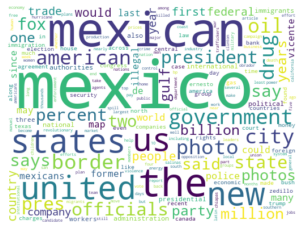

In [5]:
d = tkn_nyt.groupby('word')['freq'].sum().to_dict()


wordcloud = WordCloud(background_color = 'white',
                    width = 512,
                    height = 384)
wordcloud.generate_from_frequencies(frequencies=d)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()
